# Exercise 6: Joseph Fourier & the Fourier Transform

- Background & Motivation: Joseph Fourier & the Theory of Heat
- Pythonic Examples of Fourier Analysis
- Case Study: using spectral analysis to characterize ADHD brain waves from EEG recordings

## Background & Motivation: Joseph Fourier & the Theory of Heat

Joseph Fourier, born Jean-Baptiste Joseph Fourier on March 21, 1768, in Auxerre, France, was one of the most brilliant minds of the 18th and 19th centuries. His journey from humble beginnings to groundbreaking contributions in mathematics and physics is a testament to the power of perseverance, intellectual curiosity, and innovation.

Orphaned at the age of 9, Fourier's early life was marked by hardship. Despite these challenges, his intellect shone brightly, earning him a place at a Benedictine school where he first displayed an extraordinary aptitude for mathematics. Fourier’s natural talent caught the attention of his teachers, who nurtured his interest in the subject. Fourier's dream was to serve in the scientific corps of the army. However, this branch of service was reserved for those born to noble families, and Fourier, being an orphan of peasant descent, was thus ineligible to join. He instead enrolled in the École Royale Militaire in Auxerre and, subsequently, the École Normale in Paris.

Fourier's academic pursuits were interrupted by the French Revolution, during which he aligned himself with revolutionary ideals. He served as a teacher and administrator in the restructured educational system, and his leadership skills were apparent when he became a prominent figure in the Commission of Public Instruction. Fourier’s political and administrative work also brought him into contact with some of the leading intellectuals of his time.

In 1798, he joined Napoleon Bonaparte's expedition to Egypt as a scientific advisor, contributing to the ambitious and interdisciplinary project of documenting Egypt’s ancient and modern history. During this period, Fourier studied the region’s natural phenomena and historical artifacts, experiences that broadened his intellectual horizons.

### The Analytic Theory of Heat & The Fourier Transform
Fourier’s most celebrated work emerged from his deep interest in the flow of heat. Returning to France after Napoleon's defeat, Fourier served as a professor in Grenoble and began studying heat transfer. His magnum opus, "Théorie analytique de la chaleur" (The Analytical Theory of Heat), published in 1822, introduced revolutionary ideas.

In this work, Fourier proposed that any periodic function could be expressed as a sum of simple sine and cosine waves. This insight gave birth to what is now known as the Fourier series, a mathematical tool that provides a bridge between time-domain and frequency-domain analysis. From this, the Fourier transform was later developed, enabling the decomposition of complex signals into their constituent frequencies.

Fourier’s methods were initially met with skepticism, as they challenged the prevailing mathematical conventions of rigor at the time. However, his ideas proved to be profoundly correct and influential, laying the foundation for a new field of applied mathematics.

The Fourier transform revolutionized science and engineering, enabling advancements that Fourier himself could scarcely have imagined. Its applications are ubiquitous in modern life:

1. **Physics and Engineering**: The Fourier transform is indispensable in solving differential equations, modeling wave phenomena, and analyzing signals in electrical engineering.

2. **Medicine**: Magnetic Resonance Imaging (MRI) and Computed Tomography (CT) scans rely on Fourier analysis to reconstruct images of the human body, revolutionizing medical diagnostics.

3. **Communications**: Digital signal processing, a cornerstone of telecommunications, uses the Fourier transform for tasks such as data compression, noise reduction, and image processing.

4. **Astronomy**: Fourier techniques enable astronomers to analyze light spectra, revealing the composition and motion of celestial objects.

5. **Music and Audio**: Fourier analysis is essential for sound synthesis, music compression formats like MP3, and audio signal processing.

6. **Data Science and Artificial Intelligence**: In the era of big data, Fourier transforms are used for feature extraction, pattern recognition, and optimizing algorithms in machine learning.

At its core, the Fourier series and its derivations are mathematical algorithms designed to transform a signal from the *time domain* to the *frequency domain*. A signal in the time domain is analyzed over a period of time. A signal in the frequency domain is analyzed over a power spectrum of its frequencies. The Fourier series accomplishes this by taking in a signal function and decomposing it into a summation of sinusoidal functions that have varying frequencies and varying levels of power:

$$ f(t) \xrightarrow[\text{}]{\text{Fourier Series}} \sum_{n=1}^{\inf} (a_n cos(nt) + b_n sin(nt))$$ 

From the Fourier Series, we can derive the Continuous Fourier Transform, which can allow us to isolate individual frequency components and their corresponding power that make up a signal. This transform is extremely useful, since once we convert a signal from the time domain to the frequency domain, we can remove unwanted frequency components from our signal, and only look at the frequency components that interest us.

- **Example: Analyzing EEG Data**: Say we want to use an EEG recording to analyze the brain signals related to ADHD. Typically, signals that are recorded with an EEG device are quite noisy, and aren't very reliable (at least, the **raw** EEG signal isn't). Well, by using the **Fast Fourier Transform (FFT)**, we can transform the raw EEG signal from the time domain to the frequency domain:

![eeg](eeg-example.png)

From there, we can remove a specific frequency or frequency ranges from our dataset by implementing bandpass, bandstop, or notch filters (we will go over these filters in the next few weeks). As can be seen in the image above, there are large spikes in the frequency domain of the EEG dat, which are likely from power line interference. Those are the frequencies we remove by applying filters:

![eeg2](eeg-example2.png)

The same concept can be applied in a multitude of other applications such as audio engineering, image processing, medical diagnostics, and speech recognition.

You may have noticed by now that I am mentioning a number of different derivations of the Fourier Series, some of them being the Fourier Transform and the Fast Fourier Transform. Different derivations of the Fourier Series are applicable in different contexts. Some are more practical in use than others and some are more for mathematical theory. For example, the Continuous Fourier Transform takes continuous aperiodic signals over an infinite series:

$$F(jw) = \int_{-\inf}^{\inf} f(t)e^{-jwt}dt$$

But computers can't work with continuous signals, and it's very likely you'll be needing to work with more finite samples of a signal.
So instead, we can use the Discrete Fourier Transform, which takes in a finite signal over N Samples:

$$F(jw_k) = \sum_{n=0}^{N-1} f(x_n)e^{\frac{-j2\pi k n}{N}}$$

The complete pipline of this derivation can be thought of as such:

![fourier-derivation](fourier-derivation.png)


### Legacy and Influence
Joseph Fourier passed away on May 16, 1830, but his intellectual legacy endures. His ideas have transcended mathematics, influencing countless disciplines and industries. He exemplified the spirit of innovation, showing how abstract mathematical concepts can be harnessed to solve real-world problems.

Fourier’s life and work inspire us to think beyond the boundaries of convention, to challenge established ideas, and to dream of solutions that might seem implausible at first glance. His contributions remind us that the pursuit of knowledge, driven by curiosity and perseverance, can transform the world in ways that are both profound and enduring. He also serves as a reminder that no matter where you start out in life, you can strive for and achieve great things. The orphaned son of a peasant tailor, who was denied entry to the scientific army corps, Fourier transformed the world forever, reaching far beyond what anyone thought was possible for a man in his position. Every time you listen to music on your headphones, analyze an EEG signal in your laboratory, or ride an aerodynamic jetplane, I hope that you will take a second to pause and remember Fourier's impact on your life, and let it inspire you to reach for greatness.

## Pythonic Examples of Fourier Analysis

This code demonstrates the concept of signal sampling and its implications in digital signal processing. Here's the motivation behind each step:

1. **High-Resolution Signal Creation**:
   - The signal is created with a high sampling rate (`fs_high = 1000 Hz`), representing a 1 ms temporal resolution. This ensures the original signal is accurately captured without aliasing.

2. **Signal Composition**:
   - The signal is a combination of two sine waves: one with a frequency of 5 Hz and another at 20 Hz, weighted differently. This creates a signal with low and high-frequency components, making it ideal for demonstrating the effects of sampling.

3. **Sampling at Different Rates**:
   - The code uses three different sampling rates: 100 Hz (10 ms resolution), 10 Hz (100 ms resolution), and 1 Hz (1-second resolution). By reducing the sampling rate, the signal's temporal resolution decreases, which might lead to information loss.

4. **Visualization**:
   - For each sampling rate, the signal is visualized using a stem plot to emphasize discrete sampled points. This clearly shows how the signal representation changes as the sampling rate decreases.

This example is motivated by the Nyquist-Shannon Sampling Theorem, which states that to avoid aliasing, the sampling rate should be at least twice the highest frequency component of the signal. By comparing the sampled signals, we can observe the loss of detail and potential aliasing as the sampling rate drops below the required threshold.

/var/folders/jx/kcrhkm990p3fnsy7bmv9nh500000gn/T/ipykernel_60807/1051078962.py:18: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(sampled_t, sampled_signal, basefmt=" ", use_line_collection=True)


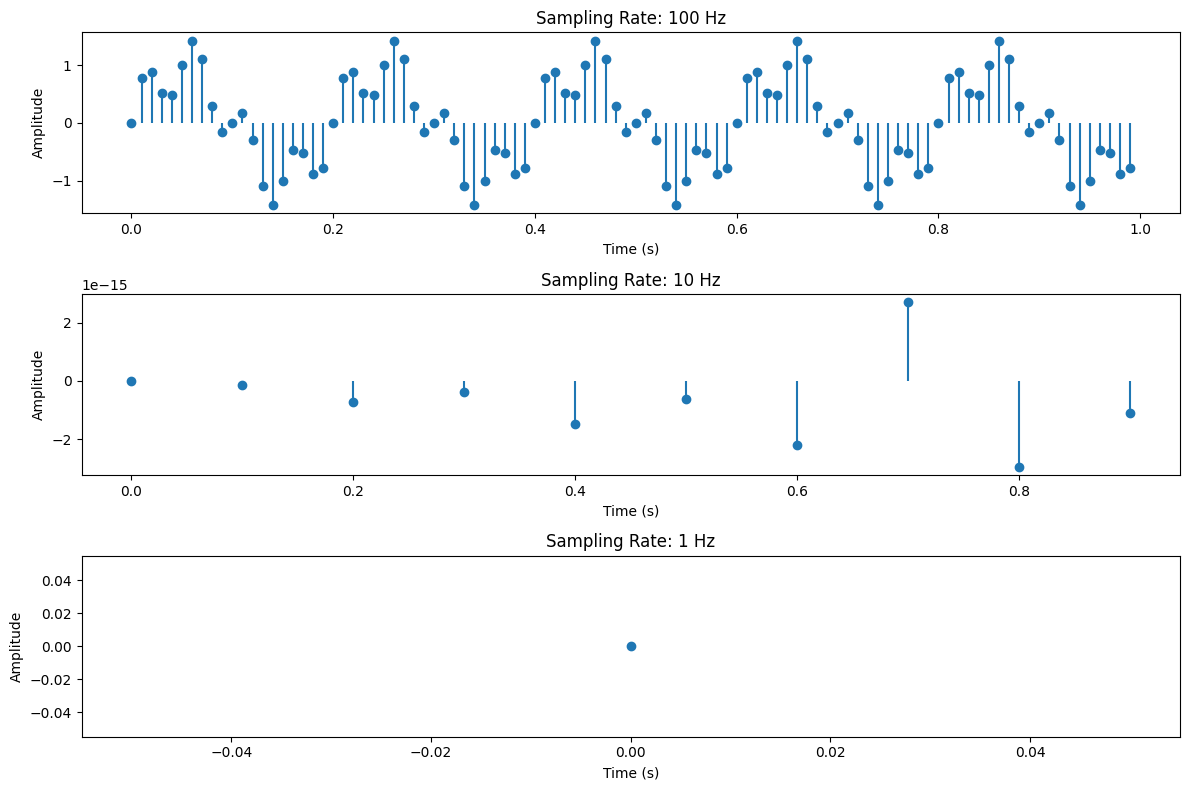

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a high-resolution signal
fs_high = 1000  # High resolution sampling rate (1ms resolution)
t = np.linspace(0, 1, fs_high, endpoint=False)  # 1 second duration
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 20 * t)

# Plot signals at different sampling rates
sampling_rates = [100, 10, 1]  # 10ms, 100ms, 1s resolution
plt.figure(figsize=(12, 8))

for i, fs in enumerate(sampling_rates):
    sampled_t = t[::fs_high // fs]
    sampled_signal = signal[::fs_high // fs]

    plt.subplot(len(sampling_rates), 1, i + 1)
    plt.stem(sampled_t, sampled_signal, basefmt=" ", use_line_collection=True)
    plt.title(f"Sampling Rate: {fs} Hz")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

### Signal Quantization

This code demonstrates the concept of signal quantization, which involves representing a continuous signal using a limited number of discrete levels. Quantization is a critical step in digital signal processing, particularly when converting analog signals to digital formats.

1. **Quantization Function**:
   - The `quantize` function takes a signal, a specified number of bits (`bits`), and an optional `stretch` parameter.
   - The number of levels for quantization is $ 2^{\text{bits}} $. For example, a 4-bit quantization has 16 levels.
   - If `stretch` is enabled, the signal's range is scaled to fully utilize the quantization levels. Otherwise, the signal is mapped directly without scaling, which might lead to truncation.

2. **Experiment with Different Bit Depths**:
   - Signals are quantized at 32-bit, 16-bit, 8-bit, and 4-bit depths.
   - Lower bit depths result in coarser approximations of the original signal, introducing quantization noise.

3. **Visualization**:
   - The plots show the quantized signals with and without stretching. This illustrates the trade-offs between preserving dynamic range (`stretch=True`) and maintaining original scaling (`stretch=False`).

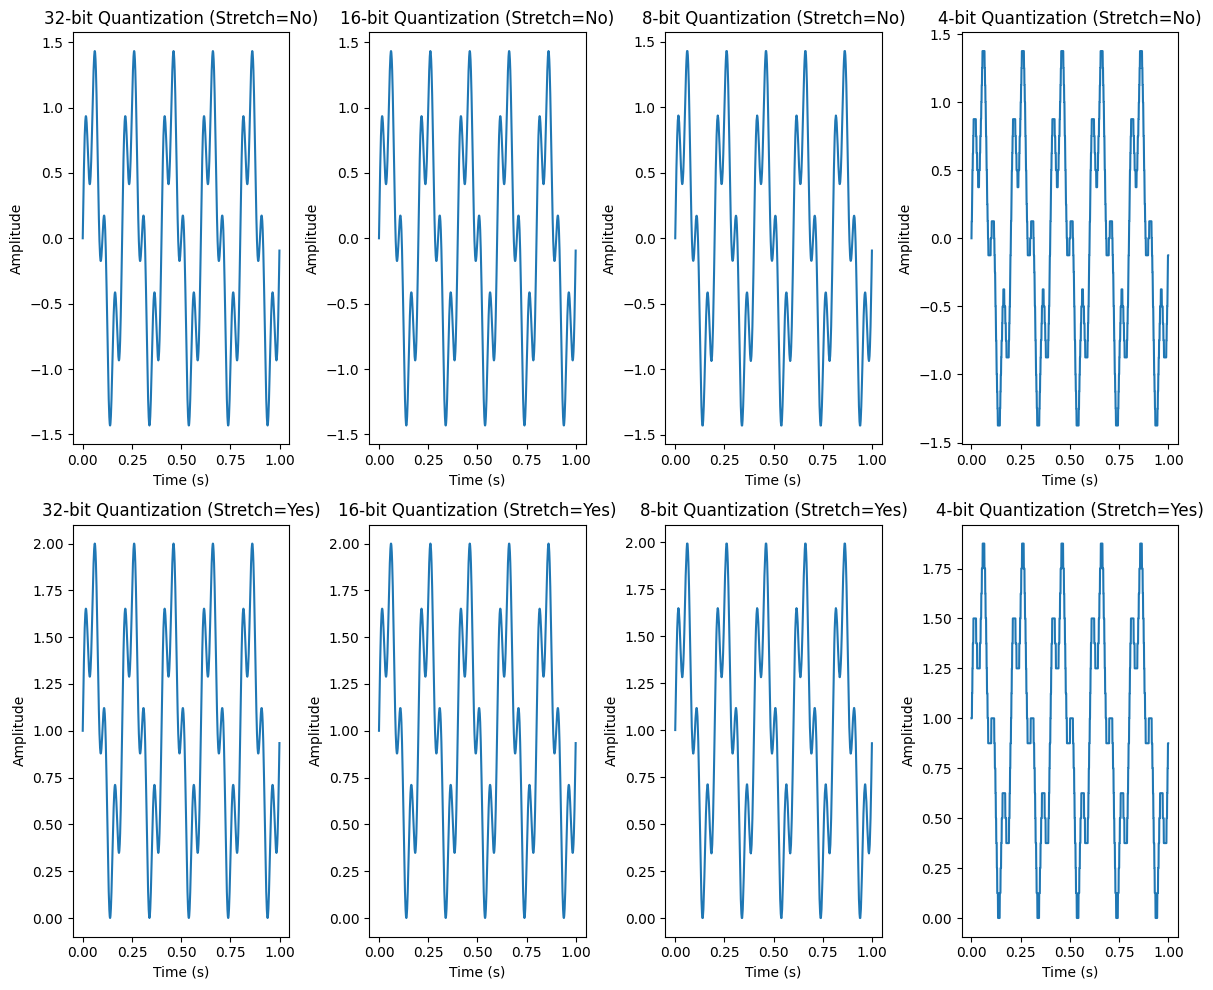

In [2]:
# Quantization function
def quantize(signal, bits, stretch=False):
    levels = 2 ** bits
    if stretch:
        signal_min, signal_max = signal.min(), signal.max()
        signal = (signal - signal_min) / (signal_max - signal_min) * (levels - 1)
    else:
        signal = signal * (levels // 2)  # No stretching
    return np.round(signal).astype(int) / (levels // 2)

# Quantize with and without stretching
bits_list = [32, 16, 8, 4]
stretching = [False, True]
plt.figure(figsize=(12, 10))

for j, stretch in enumerate(stretching):
    for i, bits in enumerate(bits_list):
        quantized_signal = quantize(signal, bits, stretch)

        plt.subplot(len(stretching), len(bits_list), j * len(bits_list) + i + 1)
        plt.plot(t, quantized_signal)
        plt.title(f"{bits}-bit Quantization (Stretch={'Yes' if stretch else 'No'})")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

### Orthogonality of Sinusoids

Before delving into Fourier Analysis, it's crucial to understand the concept of **orthogonality**. A common example of orthogonality is observed with the classic vectors $\vec{x}$ and $\vec{y}$ in a 2D coordinate system. These vectors are orthogonal, meaning they are perpendicular to each other. This orthogonal relationship allows us to represent any point in a 2D space by a combination of these two vectors. 

For instance, consider a point on the 2D plane (−3, 4). It can be represented as a combination of the $\vec{x}$ and $\vec{y}$ vectors:

$
\vec{x} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \quad 
\vec{y} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}, \quad 
(-3,4) = -3 \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 4 \begin{bmatrix} 0 \\ 1 \end{bmatrix}
$

To verify that $\vec{x}$ and $\vec{y}$ are orthogonal, we check if their dot product is zero:

$
\vec{x} \cdot \vec{y} = 1 \cdot 0 + 0 \cdot 1 = 0
$

In Fourier Analysis, we extend the concept of orthogonality to the space of functions. Specifically, we use sine and cosine functions as our orthogonal 'vectors' to span the space of all functions with a single argument $ x $. In this context, sine and cosine functions are orthogonal to each other under a different multiplication rule, which is integral-based rather than the dot product.

Fourier Analysis allows us to represent any function using only sines and cosines. This is akin to representing points in 2D space with $\vec{x}$ and $\vec{y}$, but now we're representing functions in terms of sine and cosine components. Each function can be thought of as a sum of sine and cosine functions of different amplitudes and frequencies, effectively 'spanning' the space of possible functions. Thus, sines and cosines in Fourier Analysis enable us to represent any function using a new language - that of sinusoidal waveforms.

Orthogonality is a fundamental property of sinusoidal functions in Fourier analysis. It ensures that sinusoids of different frequencies are independent, forming a basis for representing more complex signals. Here's what the code illustrates:

1. **Sinusoidal Signals**:
   - Three sinusoidal signals are created: two sine waves (`sin1` and `sin2`) with frequencies of 5 Hz and 10 Hz, and one cosine wave (`cos1`) at 5 Hz. These serve as test signals to explore orthogonality.

2. **Orthogonality Check**:
   - The dot product (or inner product) is used to verify orthogonality:
     - Dot product of `sin1` and `sin2`: Expected to be zero since the frequencies are different.
     - Dot product of `sin1` and `cos1`: Expected to be zero due to orthogonality between sine and cosine of the same frequency.
     - Dot product of `sin1` with itself: Represents the signal's energy, expected to be a positive value.

3. **Visualization**:
   - The plots illustrate the time-domain representation of the signals. This visualization complements the numerical results, providing an intuitive understanding of how orthogonality manifests.

4. **Significance**:
   - This demonstration highlights why Fourier series and transforms can decompose signals into a sum of orthogonal sinusoidal components, simplifying analysis and reconstruction.

Dot product of sin(5Hz) and sin(10Hz): 2.1671553440683056e-13
Dot product of sin(5Hz) and cos(5Hz): -3.197442310920451e-14
Dot product of sin(5Hz) with itself: 500.0


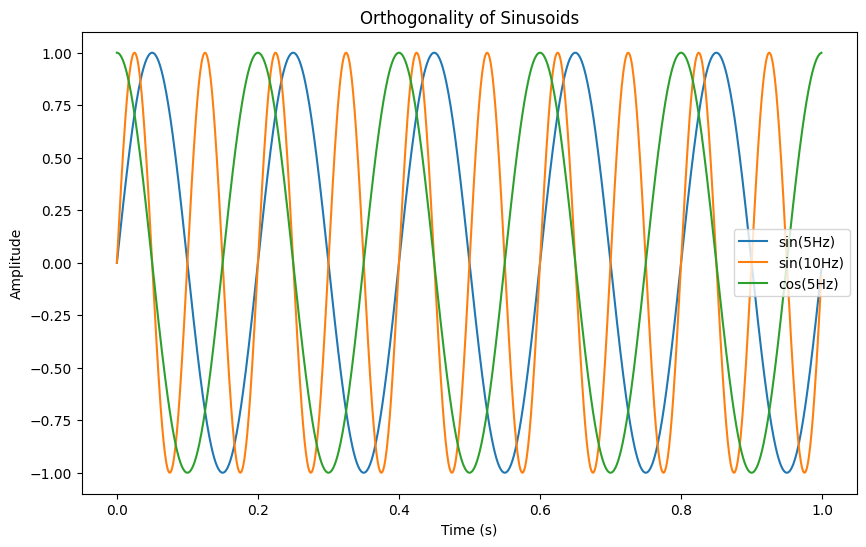

In [3]:
# Create two sinusoidal signals
freq1 = 5  # Frequency of first sinusoid
freq2 = 10  # Frequency of second sinusoid
t = np.linspace(0, 1, 1000, endpoint=False)
sin1 = np.sin(2 * np.pi * freq1 * t)
sin2 = np.sin(2 * np.pi * freq2 * t)
cos1 = np.cos(2 * np.pi * freq1 * t)

# Orthogonality check (dot product)
orthogonality_sin = np.sum(sin1 * sin2)
orthogonality_sin_cos = np.sum(sin1 * cos1)
orthogonality_self = np.sum(sin1 * sin1)

print(f"Dot product of sin({freq1}Hz) and sin({freq2}Hz): {orthogonality_sin}")
print(f"Dot product of sin({freq1}Hz) and cos({freq1}Hz): {orthogonality_sin_cos}")
print(f"Dot product of sin({freq1}Hz) with itself: {orthogonality_self}")

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(t, sin1, label=f"sin({freq1}Hz)")
plt.plot(t, sin2, label=f"sin({freq2}Hz)")
plt.plot(t, cos1, label=f"cos({freq1}Hz)")
plt.title("Orthogonality of Sinusoids")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

### Fourier Scaling Laws: Linearity, Scaling, and Time Shift

Fourier scaling laws describe how Fourier transforms respond to operations such as addition, scaling, and time shifts in the time domain. These properties form the foundation of Fourier analysis, demonstrating the transform's consistency with physical signal properties.

#### 1. **Linearity**:
   - When two signals are added in the time domain, their Fourier transforms in the frequency domain also add.
   - This property highlights that Fourier transforms preserve the superposition principle, which is vital for analyzing composite signals.

#### 2. **Scaling**:
   - If a signal is scaled in amplitude in the time domain, its Fourier transform is proportionally scaled in the frequency domain.
   - This property ensures that the transform reflects relative signal strengths accurately.

#### 3. **Time Shift**:
   - Shifting a signal in time introduces a phase shift in its Fourier transform, without altering the magnitude.
   - This property is particularly useful in applications involving signal alignment or delays.

#### Code Highlights:
- **Signal Creation**:
  - Two sinusoidal signals (`signal1` and `signal2`) and their sum are used to verify linearity.
  - A scaled version of `signal1` demonstrates the scaling property.
  - A time-shifted version of `signal1` illustrates the time shift property.

- **Fourier Transform**:
  - The `fft` function is used to compute the Fourier transform of signals.
  - Assertions ensure that the computed Fourier properties (linearity, scaling, time shift) hold true.

- **Visualization**:
  - The original signal is plotted alongside its Fourier transform's magnitude and phase to provide an intuitive understanding of these properties.


Linearity property holds.
Scaling property holds.
Time shift property holds.


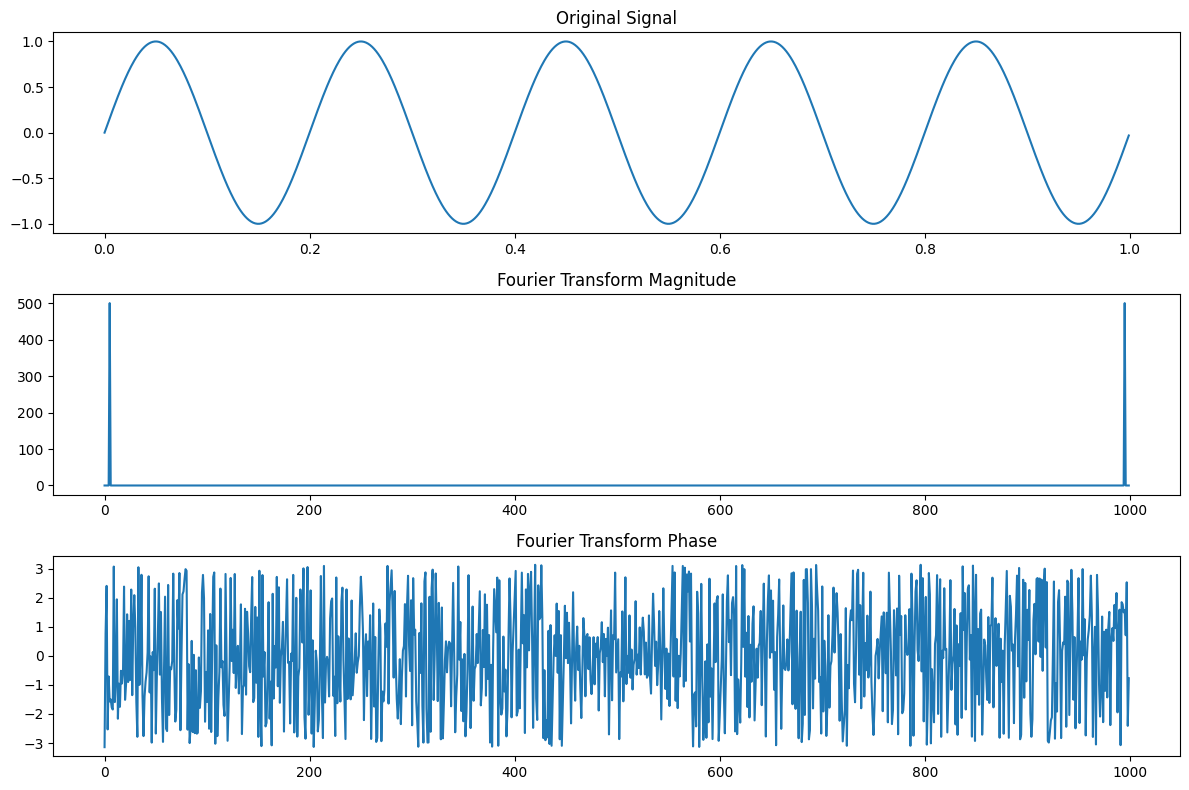

In [4]:
from scipy.fft import fft, ifft

# Create signals
signal1 = np.sin(2 * np.pi * 5 * t)
signal2 = 0.5 * np.sin(2 * np.pi * 10 * t)
signal_sum = signal1 + signal2

# Fourier Transform
fft_signal1 = fft(signal1)
fft_signal2 = fft(signal2)
fft_signal_sum = fft(signal_sum)

# Check linearity property
assert np.allclose(fft_signal_sum, fft_signal1 + fft_signal2)
print("Linearity property holds.")

# Scaling property
a = 2
scaled_signal = a * signal1
fft_scaled_signal = fft(scaled_signal)
assert np.allclose(fft_scaled_signal, a * fft_signal1)
print("Scaling property holds.")

# Time shift property
time_shift = 0.1  # Shift by 0.1 seconds
shifted_signal = np.sin(2 * np.pi * 5 * (t - time_shift))
fft_shifted_signal = fft(shifted_signal)
phase_shift = np.exp(-1j * 2 * np.pi * 5 * time_shift)
assert np.allclose(fft_shifted_signal, phase_shift * fft_signal1)
print("Time shift property holds.")

# Visualization of Fourier Transform
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, signal1, label="Original Signal")
plt.title("Original Signal")

plt.subplot(3, 1, 2)
plt.plot(np.abs(fft_signal1), label="|FFT| Original")
plt.title("Fourier Transform Magnitude")

plt.subplot(3, 1, 3)
plt.plot(np.angle(fft_signal1), label="Phase Original")
plt.title("Fourier Transform Phase")

plt.tight_layout()
plt.show()

## Example: EEG Data

We have covered the basic notions of sampling a continuous function. In the context of this course, we are now interested in how these tools can be applied to the neurophysiological domain. One example of the Fourier Transform in Neurophysiology is the analysis of electroencephalogram (EEG) recordings. EEG recordings, which are recorded as a continuous signal in the time domain, can be transformed into their representation in the frequency domain with the Fourier Transform.

The following is a simple example of using the SciPy library in python to compute the Fourier Transform of an EEG signal.

We begin by loading the signal expressed in the time domain, as it would have been recorded: 

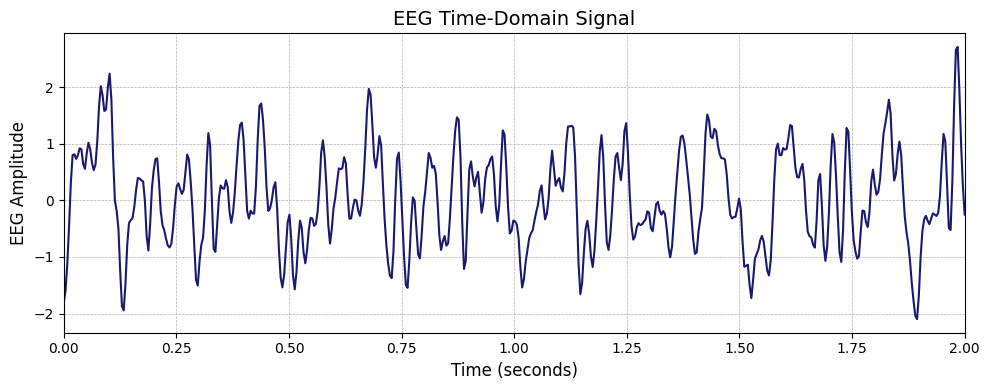

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Load the EEG signal directly
eeg_signal_file = 'EEG-signal-example.mat'
eeg_data = loadmat(eeg_signal_file)
eeg_signal = eeg_data['NewEEGSignal'][0]

# Sampling details
sampling_rate = 256  # in Hz
num_samples = 512
time_axis = np.linspace(0, num_samples / sampling_rate, num_samples)

# Creating the plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(time_axis, eeg_signal, color='midnightblue')  # Adding color to the plot
ax.set_title("EEG Time-Domain Signal", fontsize=14)
ax.set_xlabel("Time (seconds)", fontsize=12)
ax.set_ylabel("EEG Amplitude", fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_xlim(0, time_axis[-1])
fig.tight_layout()
plt.show()

Next, we employ the Discrete Fourier Transform (DFT) via the `scipy.fft.fft` function to transform this time-domain signal into the frequency domain.The function `fft` computes the DFT and yields `dft_signal`, an array representing the amplitude and phase of each frequency component within the signal. 
Next, the corresponding frequencies for each component of the DFT are calculated using `np.fft.fftfreq`. This function requires the length of the signal and the inverse of the sampling rate as inputs. The resulting array, `frequencies`, contains both positive and negative values, reflecting the symmetrical nature of the Fourier transform for real-valued signals. However, for practical purposes and clarity in analysis, the code filters and plots only the positive frequencies. This is because the negative part of the spectrum is a mirror image of the positive part and does not provide additional information for real-valued signals. The final plot displays these positive frequencies against the magnitudes of the DFT.

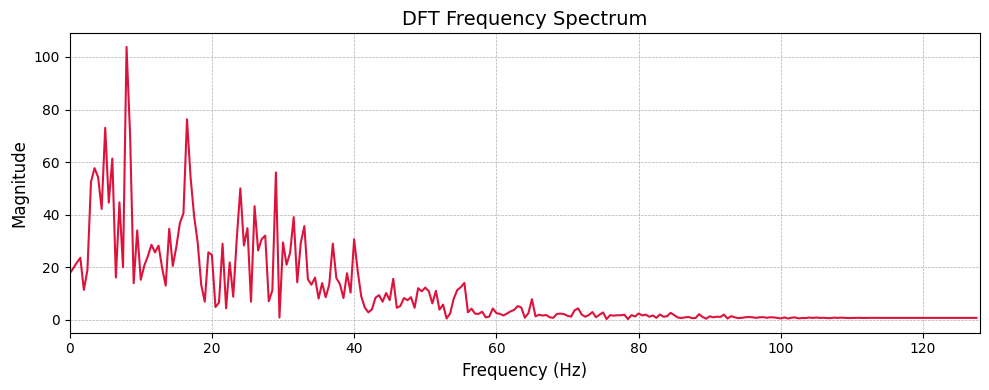

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Computing the Discrete Fourier Transform (DFT) of the signal
dft_signal = fft(eeg_signal)
signal_length = len(eeg_signal)
frequencies = np.fft.fftfreq(signal_length, 1/sampling_rate)

# Filtering out only the positive frequencies
positive_frequencies = frequencies >= 0

# Creating the frequency spectrum plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(frequencies[positive_frequencies], np.abs(dft_signal[positive_frequencies]), color='crimson')
ax.set_title("DFT Frequency Spectrum", fontsize=14)
ax.set_xlabel("Frequency (Hz)", fontsize=12)
ax.set_ylabel("Magnitude", fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_xlim(0, sampling_rate/2)
fig.tight_layout()
plt.show()

## Visualization: Harmonics of a Square Wave

Interactive demonstration of Fourier Series in 3D (in fact, it is Discrete Fourier Transform in 3D, FFT). It is easy to understand the connection between time and frequency domain. All in one 3D picture: time axis, frequency axis, amplitudes, and phases. Everything is interactive - you can drag amplitudes, phases, draw your own signal, change number of harmonics, turn on sound and listen to the impact of the actions. And more - you can go to the tutorial section and watch and listen to a lot of interesting commented automatic demonstrations.
Predefined signals: Sine, cosine, square (rectangle), triangle, sawtooth, beats, sine impulse.

When deriving the Fourier Series of an odd function, in this case a Square wave, each term in the following equation is called a **harmonic component** of the signal:

$
\hat{f}(t) = {4h}/{\pi} \left( \sin \omega t + \frac{\sin 3\omega t}{3} + \frac{\sin
5\omega t}{5} + \ldots \right)
$

As more and more terms are added, the series more closely captures the shape of the square function being modeled.  Try increasing and decreasing the number of harmonic components to see how the series models the square wave function.

In [7]:
from IPython.display import IFrame
IFrame("https://tomasboril.cz/fourierseries3d/en/", 900,500)

## Case Study: using spectral analysis to characterize ADHD brain waves from EEG recordings

In this week's directory, I have included a directory called `MNE-EEG-PROCESSING` that contains a case study project for using spectral analysis a la Fourier to analyze the brain waves associated with ADHD, all from EEG recordings. Feel free to peruse the project for inspiration / deeper exploration. 

The project is taken from the following GitHub repository: https://github.com/vxnuaj/MNE-ADHD